In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sk
%matplotlib inline

# Медицинская диагностика

In [3]:
data = np.loadtxt('../source/hos13.dat', skiprows = 1)
print(data.shape)
print(data[:10, :])

(109, 3)
[[   1.1861009   83.14735      2.       ]
 [   1.3237845   67.08343      2.       ]
 [   0.8216278  120.00681      2.       ]
 [   1.1742367   56.82328      1.       ]
 [   1.1961126   84.18729      2.       ]
 [   1.479302    83.16051      2.       ]
 [   1.2122465   94.83045      2.       ]
 [   1.2161919   86.86843      2.       ]
 [   1.1841107   89.14896      2.       ]
 [   1.768121    62.16319      1.       ]]


In [4]:
X = data[:, :2]
y = np.array(data[:, 2], dtype = int)
N, d = X.shape
N, d

(109, 2)

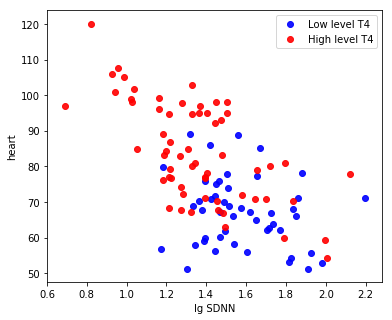

In [5]:
plt.figure(figsize = (6, 5))
plt.scatter(X[y == 1, 0], X[y == 1, 1], color = 'b', alpha = 0.9, label = 'Low level T4')
plt.scatter(X[y == 2, 0], X[y == 2, 1], color = 'r', alpha = 0.9, label = 'High level T4')
plt.xlabel('lg SDNN')
plt.ylabel('heart')
plt.legend()

In [6]:
from sklearn import neighbors
model = neighbors.KNeighborsClassifier(n_neighbors = 5)
model.fit(X, y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [7]:
print(model.predict([[30, 90]]))

[1]


In [8]:
print(model.predict_proba([[30, 90]]))

[[ 0.6  0.4]]


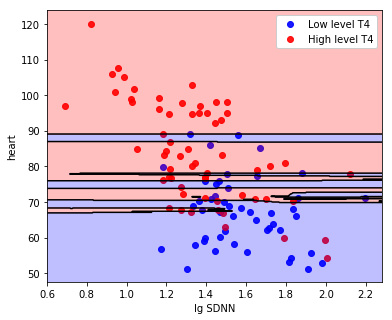

In [9]:
import mysk
plt.figure(figsize = (6, 5))
plt.scatter(X[y == 1, 0], X[y == 1, 1], color = 'b', alpha = 0.9, label = 'Low level T4')
plt.scatter(X[y == 2, 0], X[y == 2, 1], color = 'r', alpha = 0.9, label = 'High level T4')
mysk.draw_sep_curve(model)
plt.xlabel('lg SDNN')
plt.ylabel('heart')
plt.legend(framealpha = 1)

Наверное, это не совсем то, что мы хотели...

In [10]:
x0_min, x0_max = X[:, 0].min(), X[:, 0].max()
x1_min, x1_max = X[:, 1].min(), X[:, 1].max()
d0 = x0_max - x0_min
d1 = x1_max - x1_min

In [ ]:
from sklearn import preprocessing

#X_scaled = preprocessing.scale(X_train)

In [14]:
model = neighbors.KNeighborsClassifier(n_neighbors = 1, metric = 'wminkowski',
                                       metric_params = {weights: [1./d0, 1./d1]})
model.fit(X, y)

NameError: name 'weights' is not defined

In [15]:
print(model.predict([[2, 50]]))

[1]


In [16]:
print(model.predict_proba([[1, 170]]))

[[ 0.  1.]]


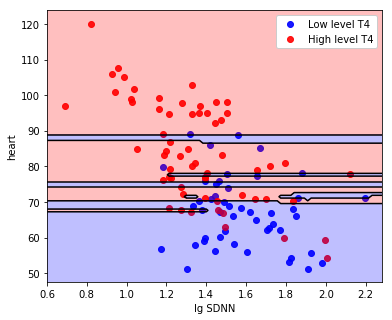

In [17]:
plt.figure(figsize = (6, 5))
plt.scatter(X[y == 1, 0], X[y == 1, 1], color = 'b', alpha = 0.9, label = 'Low level T4')
plt.scatter(X[y == 2, 0], X[y == 2, 1], color = 'r', alpha = 0.9, label = 'High level T4')
mysk.draw_sep_curve(model, res = 100)
plt.xlabel('lg SDNN')
plt.ylabel('heart')
plt.legend(framealpha = 1)

### Перекрестный контроль

Как проверить качество модели?

Данных слишком мало, чтобы делить их на обучающую и тестовую выборки.

Будем использовать _перекрестный_ (или _скользящий_) _контроль_ (_cross-validation_)

In [20]:
from sklearn import cross_validation
model = neighbors.KNeighborsClassifier(n_neighbors = 1, metric = 'wminkowski',
                                       w = [1./d0, 1./d1])
scores = cross_validation.cross_val_score(model, X, y, cv = 10)
print scores
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
print("Error:    %0.2f (+/- %0.2f)" % (1 - scores.mean(), scores.std() * 2))

[ 0.58333333  0.63636364  0.72727273  0.81818182  0.63636364  0.90909091
  0.72727273  0.63636364  0.7         0.5       ]
Accuracy: 0.69 (+/- 0.22)
Error:    0.31 (+/- 0.22)


In [ ]:
N

In [21]:
kk = [1, 3, 5, 7] + range(10, 85, 5)
err_cv = []
for k in kk:
    model = neighbors.KNeighborsClassifier(n_neighbors = k)
    model.fit(X, y)
    scores = cross_validation.cross_val_score(model, X, y, cv = 5)
    err_cv.append(1 - scores.mean())

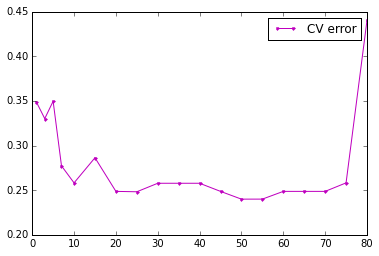

In [22]:
plt.plot(kk, err_cv, '.-m', label = 'CV error')
plt.legend(loc = 'best')

In [23]:
print min(err_cv)
print kk[err_cv.index(min(err_cv))]

0.239939770375
50


(85, 0)

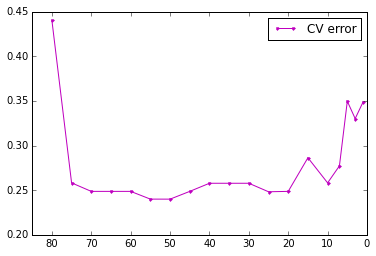

In [24]:
plt.plot(kk, err_cv, '.-m', label = 'CV error')
plt.legend(loc = 'best')
plt.xlim([85, 0])

## Стандартизация

In [25]:
from sklearn import preprocessing
X_scaled = preprocessing.scale(X)
print X_scaled.mean(axis = 0)
print X_scaled.std(axis = 0)

[ -1.74681880e-16   1.57315547e-15]
[ 1.  1.]


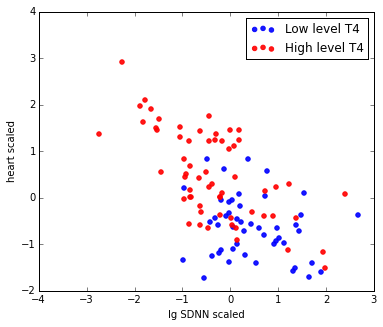

In [26]:
plt.figure(figsize = (6, 5))
plt.scatter(X_scaled[y == 1, 0], X_scaled[y == 1, 1], color = 'b', alpha = 0.9, label = 'Low level T4')
plt.scatter(X_scaled[y == 2, 0], X_scaled[y == 2, 1], color = 'r', alpha = 0.9, label = 'High level T4')
plt.xlabel('lg SDNN scaled')
plt.ylabel('heart scaled')
plt.legend()

In [27]:
model_sc = neighbors.KNeighborsClassifier(n_neighbors = 1)
model_sc.fit(X_scaled, y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_neighbors=1, p=2, weights='uniform')

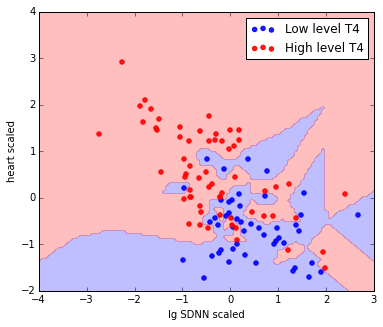

In [28]:
plt.figure(figsize = (6, 5))
#plt.contourf(xx, yy, zz, alpha = 0.25)
plt.scatter(X_scaled[y == 1, 0], X_scaled[y == 1, 1], color = 'b', alpha = 0.9, label = 'Low level T4')
plt.scatter(X_scaled[y == 2, 0], X_scaled[y == 2, 1], color = 'r', alpha = 0.9, label = 'High level T4')
sk_draw.draw_sep_curve(model_sc)
plt.xlabel('lg SDNN scaled')
plt.ylabel('heart scaled')
plt.legend(framealpha = 1)

## Приведение к интервалу 0-1

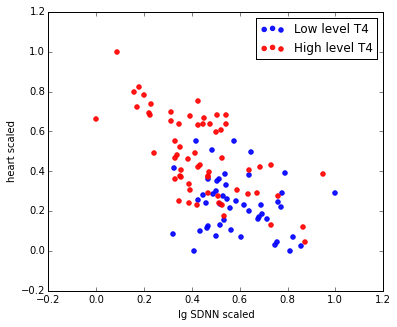

In [29]:
from sklearn import preprocessing
X_minmaxsc = preprocessing.MinMaxScaler().fit_transform(X)
plt.figure(figsize = (6, 5))
plt.scatter(X_minmaxsc[y == 1, 0], X_minmaxsc[y == 1, 1], color = 'b', alpha = 0.9, label = 'Low level T4')
plt.scatter(X_minmaxsc[y == 2, 0], X_minmaxsc[y == 2, 1], color = 'r', alpha = 0.9, label = 'High level T4')
plt.xlabel('lg SDNN scaled')
plt.ylabel('heart scaled')
plt.legend()

Всегда ли полезна стандартизация/приведение к интервалу?